In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import os
from scipy.optimize import curve_fit
"""
CUIDADO!!
"""
import warnings
warnings.filterwarnings("ignore")

In [2]:
from fitterClass import funcFitter
from utils import find_best_b, plot_exponentials

* d para Doente
* s para Saudavel

## Loading Data 

In [3]:
with open("data//doente.txt", "r") as file:
    d_data = file.readlines()
    #Cleaning
    d_data = np.array([list(map(float, row.split())) for row in d_data if row != '\n'])

with open("data//normal.txt", "r") as file:
    s_data = file.readlines()
    #Cleaning
    s_data = np.array([list(map(float, row.split())) for row in s_data if row != '\n'])
    
with open("data//k_func.txt", "r") as file:
    k_data = file.readlines()
    #Cleaning
    k_data = np.array([list(map(float, row.split())) for row in k_data if row != '\n'])

## Cleaning 

In [4]:
d_data[6,1] = 466 # valor corrigido

## Fitting Sigmoid

### Parameters

In [5]:
def sigmoid(x, a, b, c, d):
    return a + b/(1 + np.exp(-(x-c)/d))

def exponential(x, a, b, c, d):
    return a - b*np.exp(-(x-c)/d)

estimators = ["lm", "trf", "dogbox"]
funcs = [sigmoid, exponential]

### Injuried

In [6]:
#Interpolando
fitter = funcFitter(d_data[0::2, :], n_point = 5, estimators = estimators)
injuried = fitter.fit(funcs=funcs, interpolate=True, n_interp_point=100, interp_method="linear")
injuried.to_csv(os.path.join("data","injuried_fit.csv"), index = False)
injuried.head(2)

,function,function_name,estimator,error,param,interp_point,interp_pressure,interp_volume
0,<function sigmoid at 0x7f344ccebee0>,sigmoid,lm,0.112926,"[-169.3405711072902, 1201.2076659367995, 24.53...",5,"[10.546184739, 15.53012048195, 20.514056224900...","[-0.324999419644, 115.83520981764416, 278.9836..."
1,<function sigmoid at 0x7f344ccebee0>,sigmoid,lm,5.986775,"[-196.62443769409623, 1289.4969263082037, 24.9...",10,"[10.546184739, 12.761267291422222, 14.97634984...","[-0.324999419644, 51.016311015736, 102.3576214..."


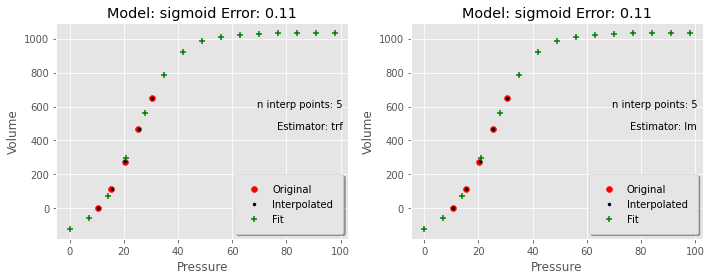

In [7]:
fitter.make_plot(df = injuried, n_best = 2)

### K data

In [8]:
#Interpolando
fitter_k = funcFitter(k_data[0::2, :], n_point = 5, estimators = estimators)
k_df = fitter_k.fit(funcs=funcs, interpolate=True, n_interp_point=100, interp_method="linear")
k_df.to_csv(os.path.join("data","k_df.csv"), index = False)
k_df.head(2)

,function,function_name,estimator,error,param,interp_point,interp_pressure,interp_volume
0,<function sigmoid at 0x7f344ccebee0>,sigmoid,lm,0.227276,"[-296.6860380729812, 1708.2337167840847, 28.17...",5,"[10.178125381469727, 15.249219179153442, 20.32...","[-197.8517303466797, -93.77818494931996, 93.38..."
1,<function sigmoid at 0x7f344ccebee0>,sigmoid,lm,32.594039,"[-313.2649171917701, 1824.0283190865541, 28.80...",10,"[10.178125381469727, 12.431944847106934, 14.68...","[-197.8517303466797, -151.86617670726255, -105..."


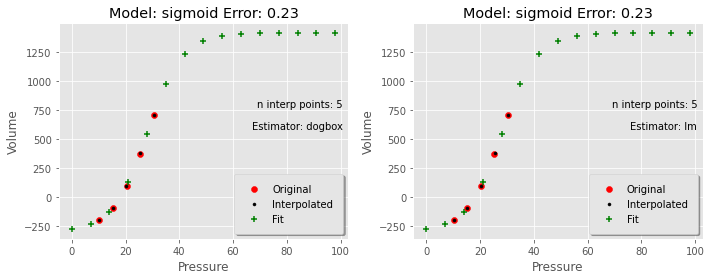

In [9]:
fitter_k.make_plot(df = k_df, n_best = 2)

### Find zero and exp (NAO INTERPOLADO)

In [10]:
def exponential_cicle_fixed_b(x, a, c):
    return -a*np.exp(-best_b*x)+c
   

Best b: 0.05700000000000001
Best zero: [  10.05812538 -199.43215422]


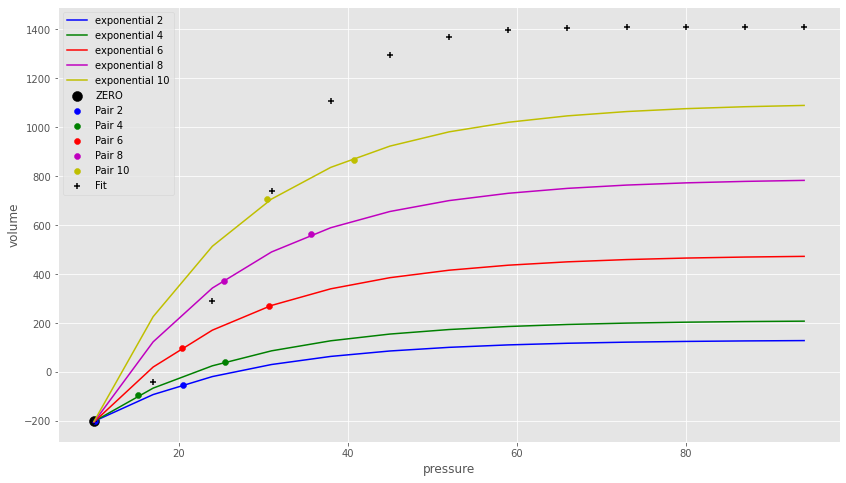

In [11]:
best_b, guess_zero = find_best_b(k_df, raw_pressures=k_data,  b_percentage_range=(0.05,0.125), step=0.001, plot_figure=False)

plot_exponentials(best_b, guess_zero, k_df, k_data, exponential_cicle_fixed_b)

Best b: 0.07800000000000003
Best zero: [  5.43618474 -75.70561171]


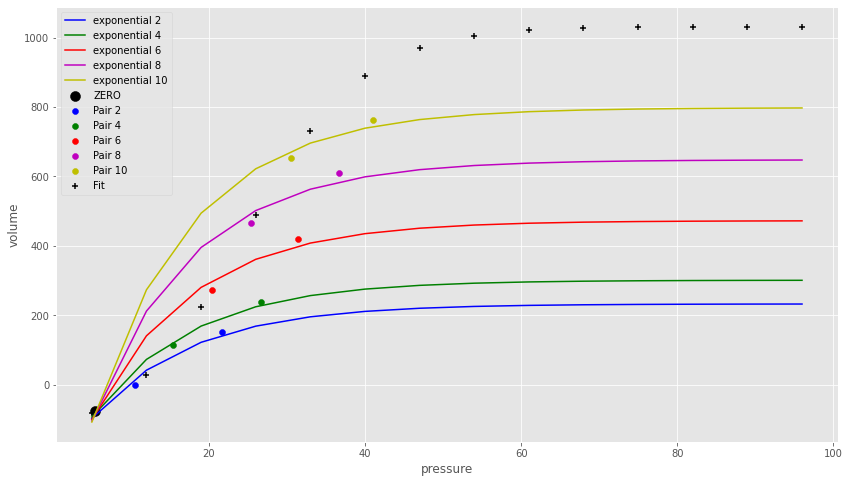

In [12]:
best_b, guess_zero = find_best_b(injuried, raw_pressures=d_data,  b_percentage_range=(0.05,0.125), step=0.001, plot_figure=False)

plot_exponentials(best_b, guess_zero, injuried, d_data, exponential_cicle_fixed_b)

### Healthy

In [13]:
#Interpolando
fitter = funcFitter(s_data[0::2, :], n_point = 3, estimators = estimators)
healthy = fitter.fit(funcs=funcs, interpolate=True, n_interp_point=10, interp_method="linear")

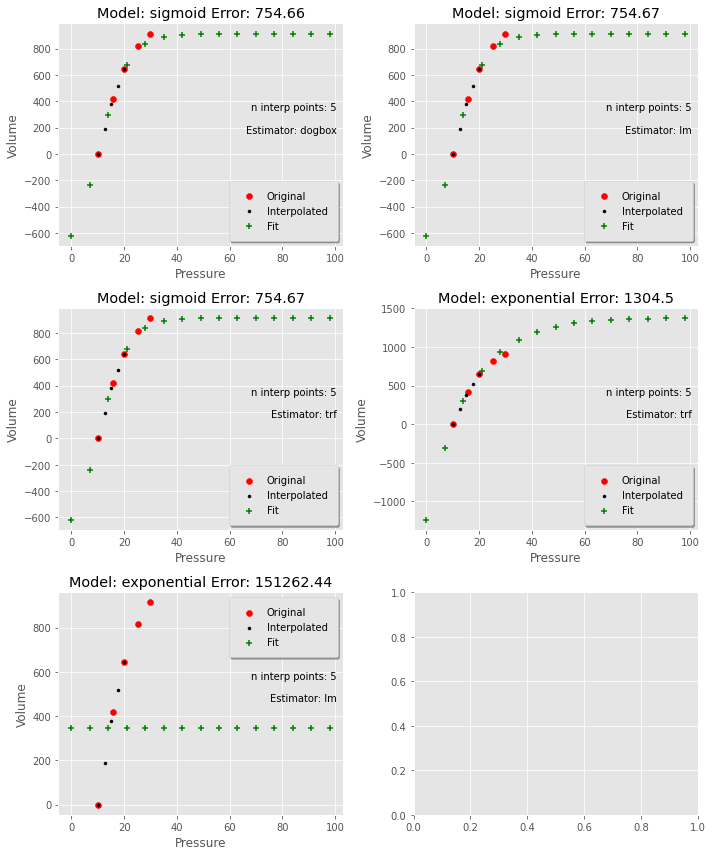

In [14]:
fitter.make_plot(df = healthy, n_best = 5)